# import results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r"path_to_performance_study_results"

df = pd.read_excel(path, sheet_name="Tabular Data only")  # optional: engine="openpyxl
df.head()

,ID,Prompt,Metric (0-3),"E1+E4, V1","E1+E4, V2","E1+E4, V3","E2+E5, V1","E2+E5, V2","E2+E5, V3","E3+E6, V1","E3+E6, V2","E3+E6, V3"
0,1,"""Show the distribution of end schedule deviati...",Perceived prompt difficulty,1,1,1,1,1,1,1,1,1
1,1,"""Show the distribution of end schedule deviati...",Task choice quality,3,3,3,3,2,3,3,3,3
2,1,"""Show the distribution of end schedule deviati...",Data scoping quality,3,3,3,3,3,3,3,3,3
3,1,"""Show the distribution of end schedule deviati...",Preparation and aggregation quality,3,3,3,3,3,3,3,2,3
4,1,"""Show the distribution of end schedule deviati...",Summary quality,2,3,2,2,2,1,1,1,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            210 non-null    int64 
 1   Prompt        210 non-null    object
 2   Metric (0-3)  210 non-null    object
 3   E1+E4, V1     210 non-null    int64 
 4   E1+E4, V2     210 non-null    int64 
 5   E1+E4, V3     210 non-null    int64 
 6   E2+E5, V1     210 non-null    int64 
 7   E2+E5, V2     210 non-null    int64 
 8   E2+E5, V3     210 non-null    int64 
 9   E3+E6, V1     210 non-null    int64 
 10  E3+E6, V2     210 non-null    int64 
 11  E3+E6, V3     210 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 19.8+ KB


In [8]:
df2 = df.copy()

df2["Hybrid_Cloud"] = np.round(df2[["E1+E4, V1", "E2+E5, V1", "E3+E6, V1"]].mean(axis=1), 2)
df2["Baseline_Cloud"] = np.round(df2[["E1+E4, V2", "E2+E5, V2", "E3+E6, V2"]].mean(axis=1), 2)
df2["Hybrid_Local"] = np.round(df2[["E1+E4, V3", "E2+E5, V3", "E3+E6, V3"]].mean(axis=1), 2)

# alte Bewertungs-Spalten entfernen
old_cols = [
    "E1+E4, V1", "E1+E4, V2", "E1+E4, V3",
    "E2+E5, V1", "E2+E5, V2", "E2+E5, V3",
    "E3+E6, V1", "E3+E6, V2", "E3+E6, V3",
]
df2 = df2.drop(columns=old_cols)

df2.head(30)

,ID,Prompt,Metric (0-3),Hybrid_Cloud,Baseline_Cloud,Hybrid_Local
0,1,"""Show the distribution of end schedule deviati...",Perceived prompt difficulty,1.00,1.00,1.00
1,1,"""Show the distribution of end schedule deviati...",Task choice quality,3.00,2.67,3.00
2,1,"""Show the distribution of end schedule deviati...",Data scoping quality,3.00,3.00,3.00
3,1,"""Show the distribution of end schedule deviati...",Preparation and aggregation quality,3.00,2.67,3.00
4,1,"""Show the distribution of end schedule deviati...",Summary quality,1.67,2.00,1.33
5,1,"""Show the distribution of end schedule deviati...",Visualization helpfulness,3.00,1.33,3.00
6,1,"""Show the distribution of end schedule deviati...",Analysis request fulfilment,2.67,2.33,2.33
7,2,"""Show me a statistical summary of the cycle t...",Perceived prompt difficulty,1.67,1.67,1.67
8,2,"""Show me a statistical summary of the cycle t...",Task choice quality,3.00,2.67,3.00
9,2,"""Show me a statistical summary of the cycle t...",Data scoping quality,3.00,2.67,3.00


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              210 non-null    int64  
 1   Prompt          210 non-null    object 
 2   Metric (0-3)    210 non-null    object 
 3   Hybrid_Cloud    210 non-null    float64
 4   Baseline_Cloud  210 non-null    float64
 5   Hybrid_Local    210 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.0+ KB


# correlation of evaluations for the same analysis

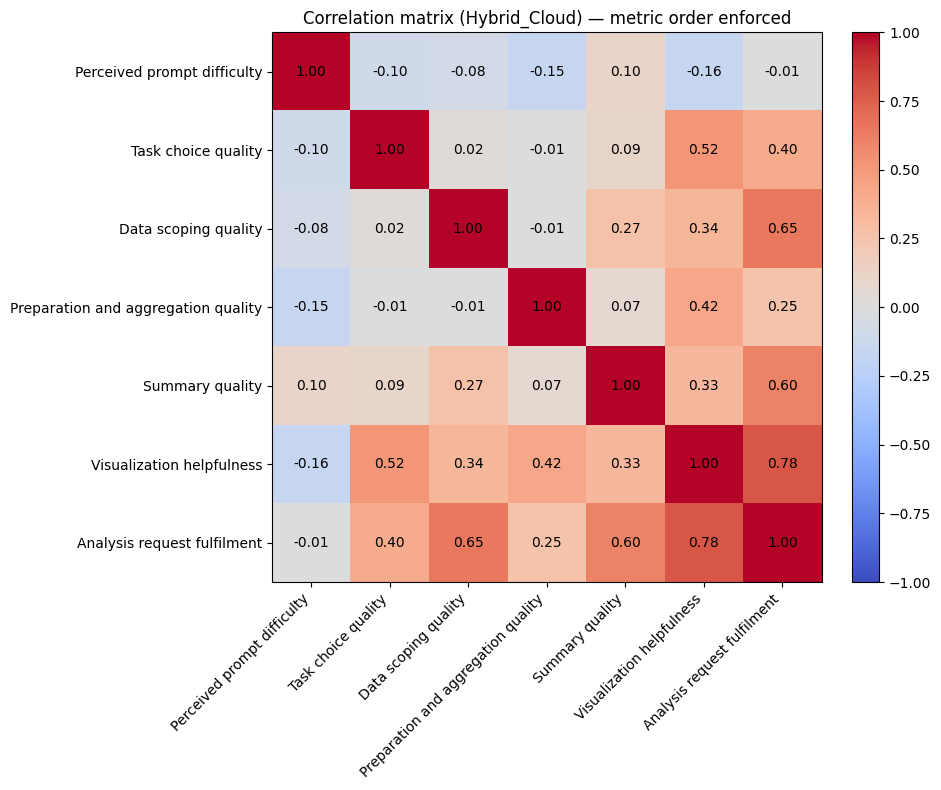

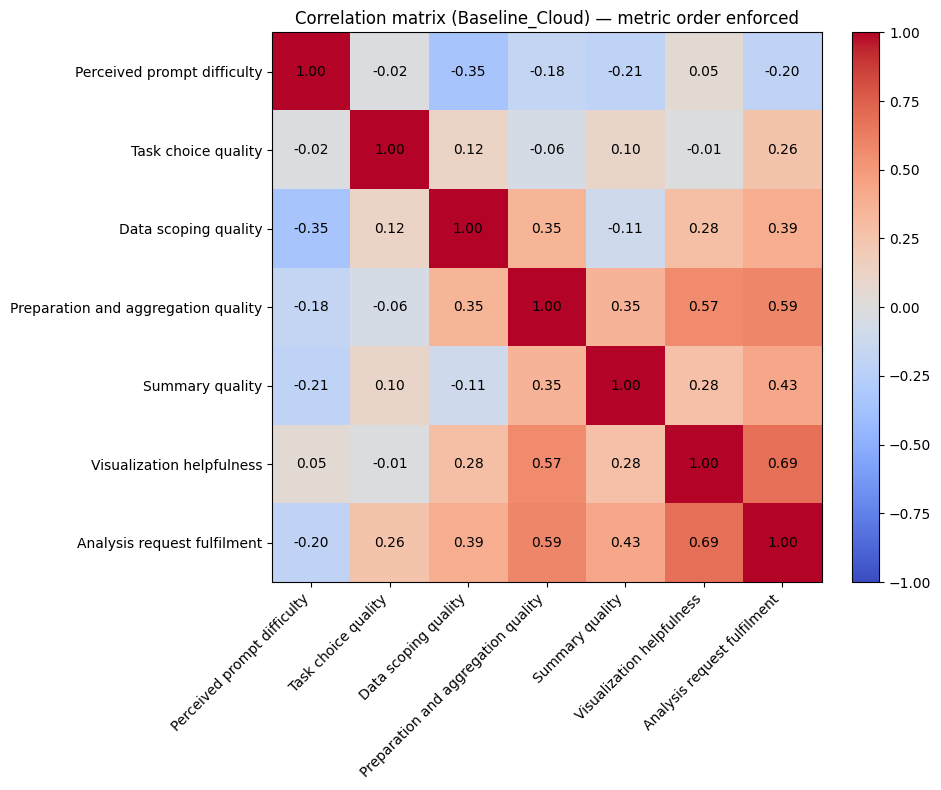

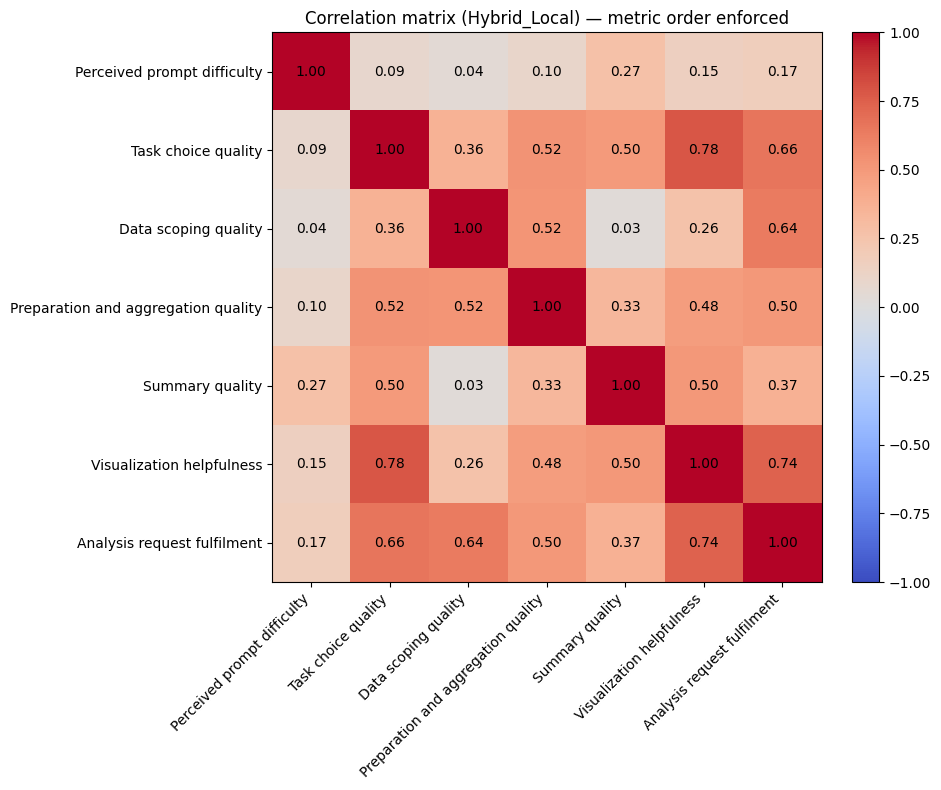

In [9]:
metric_order = [
    "Perceived prompt difficulty",
    "Task choice quality",
    "Data scoping quality",
    "Preparation and aggregation quality",
    "Summary quality",
    "Visualization helpfulness",
    "Analysis request fulfilment",
]

metric_col = "Metric (0-3)"
versions = ["Hybrid_Cloud", "Baseline_Cloud", "Hybrid_Local"]

for v in versions:
    wide = (
        df2.pivot_table(index="ID", columns=metric_col, values=v, aggfunc="mean")
           .reindex(columns=metric_order)
    )
    corr = wide.corr(method="pearson").reindex(index=metric_order, columns=metric_order)

    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(corr.values, vmin=-1, vmax=1, cmap="coolwarm")

    ax.set_xticks(range(len(metric_order)))
    ax.set_yticks(range(len(metric_order)))
    ax.set_xticklabels(metric_order, rotation=45, ha="right")
    ax.set_yticklabels(metric_order)

    # Werte in die Zellen
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center")

    ax.set_title(f"Correlation matrix ({v}) — metric order enforced")
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

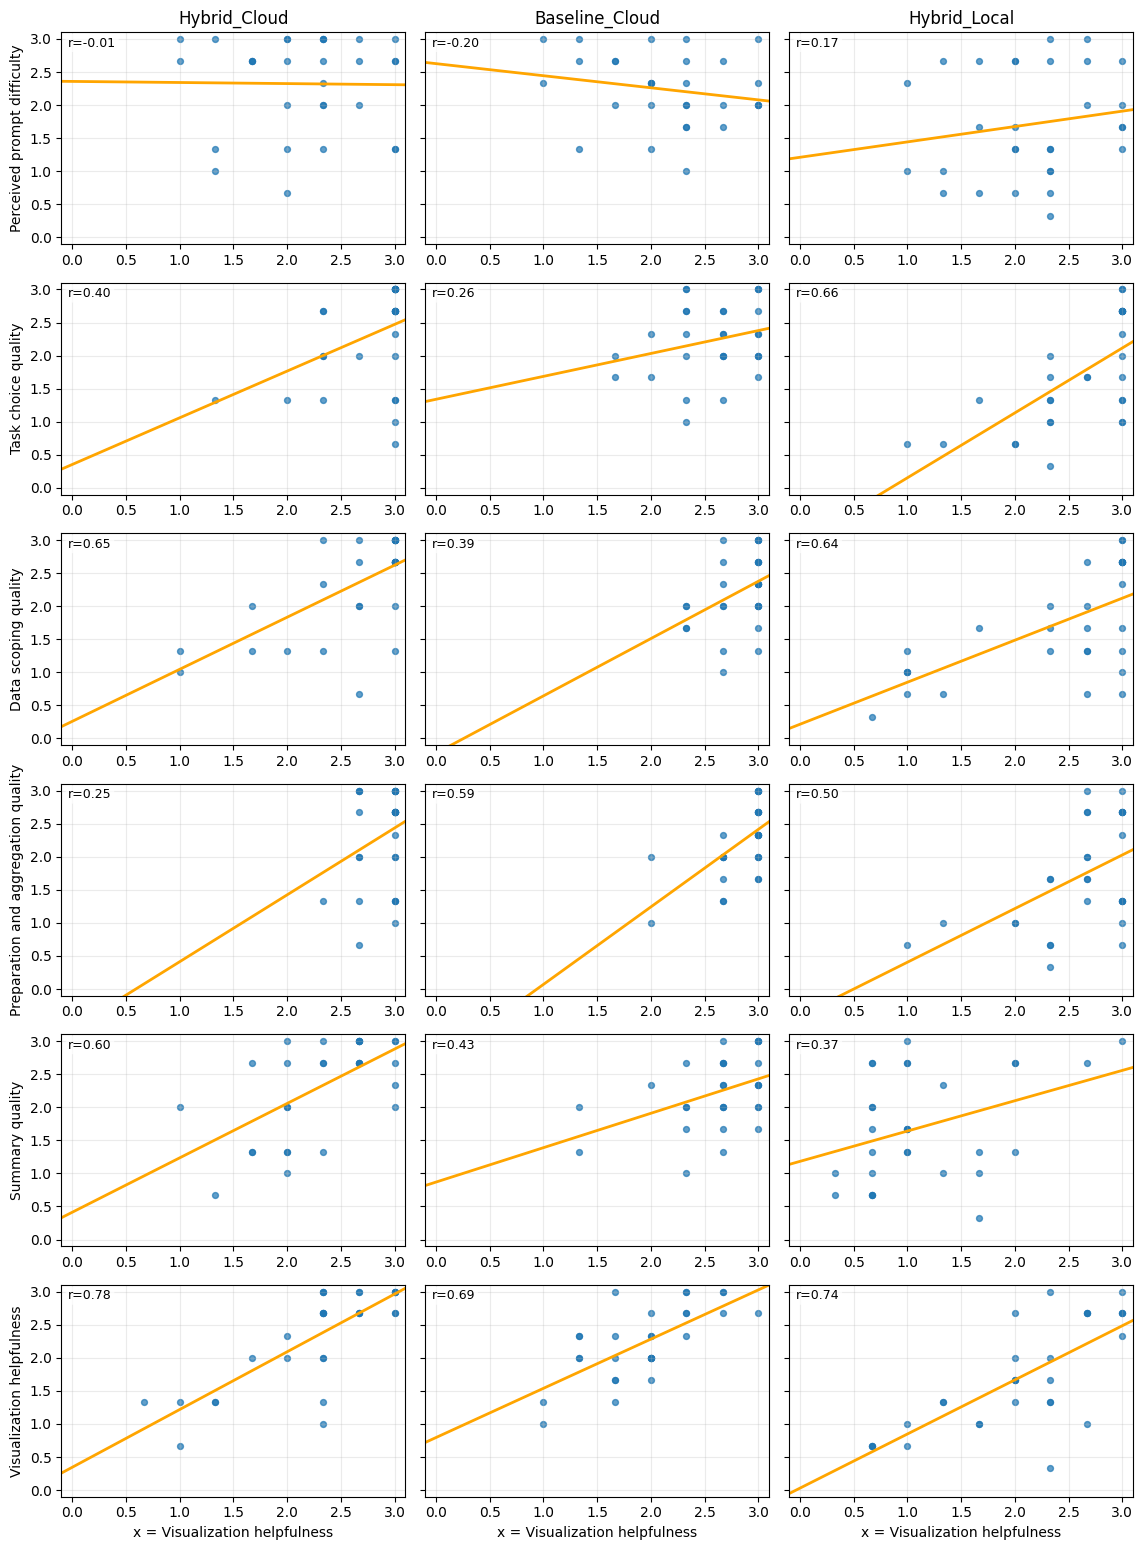

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

metric_order = [
    "Perceived prompt difficulty",
    "Task choice quality",
    "Data scoping quality",
    "Preparation and aggregation quality",
    "Summary quality",
    "Visualization helpfulness",
    "Analysis request fulfilment",
]

metric_col = "Metric (0-3)"
versions = ["Hybrid_Cloud", "Baseline_Cloud", "Hybrid_Local"]

target = "Analysis request fulfilment"
features = [m for m in metric_order if m != target]

nrows, ncols = len(features), len(versions)

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(3.8 * ncols, 2.6 * nrows),
    sharey=True,
    sharex="row",
)
axes = np.atleast_2d(axes)

for c, v in enumerate(versions):
    wide = (
        df2.pivot_table(index="ID", columns=metric_col, values=v, aggfunc="mean")
           .reindex(columns=metric_order)
    )

    for r, feat in enumerate(features):
        ax = axes[r, c]

        x = wide[feat]
        y = wide[target]
        m = x.notna() & y.notna()

        xm = x[m].to_numpy()
        ym = y[m].to_numpy()

        ax.scatter(xm, ym, alpha=0.7, s=18)

        # Trend line (orange)
        if xm.size >= 2 and np.nanstd(xm) > 0:
            slope, intercept = np.polyfit(xm, ym, 1)
            xs = np.linspace(-0.1, 3.1, 50)
            ax.plot(xs, slope * xs + intercept, color="orange", linewidth=2)

        # Pearson correlation, compact annotation
        if xm.size >= 2 and np.nanstd(xm) > 0 and np.nanstd(ym) > 0:
            rr = np.corrcoef(xm, ym)[0, 1]
            txt = f"r={rr:.2f}"
        else:
            txt = "r=NA"

        ax.text(
            0.02, 0.98, txt,
            transform=ax.transAxes,
            ha="left", va="top",
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7, edgecolor="none")
        )

        ax.set_xlim(-0.1, 3.1)
        ax.set_ylim(-0.1, 3.1)
        ax.grid(True, alpha=0.25)

        if r == 0:
            ax.set_title(v)
        if c == 0:
            ax.set_ylabel(feat)
        if r == nrows - 1:
            ax.set_xlabel(f"x = {feat}")

plt.tight_layout()
plt.show()

# overall performance

In [11]:
systems_order = ["Baseline_Cloud", "Hybrid_Cloud", "Hybrid_Local"]

df_long = (
    df2.melt(
        id_vars=["ID", "Prompt", "Metric (0-3)"],
        value_vars=systems_order,
        var_name="system",
        value_name="score",
    )
    .rename(columns={
        "ID": "prompt_id",
        "Prompt": "prompt_text",
        "Metric (0-3)": "metric",
    })
)

df_long["score"] = pd.to_numeric(df_long["score"], errors="coerce")
df_long = df_long.dropna(subset=["score"]).copy()
df_long["system"] = pd.Categorical(df_long["system"], categories=systems_order, ordered=True)

In [36]:
metric_order = [
    "Perceived prompt difficulty",
    "Task choice quality",
    "Data scoping quality",
    "Preparation and aggregation quality",
    "Summary quality",
    "Visualization helpfulness",
    "Analysis request fulfilment",
]

# Gruppen wie früher: "Pipeline" vs "Output" (mit deinen neuen Labels)
PIPELINE_METRICS = [
    "Task choice quality",
    "Data scoping quality",
    "Preparation and aggregation quality",
]

OUTPUT_METRICS = [
    "Summary quality",
    "Visualization helpfulness",
]

DIFF_METRIC = "Perceived prompt difficulty"

palette = {
    "Baseline_Cloud": "#F28E2B",
    "Hybrid_Cloud":   "#4E79A7",
    "Hybrid_Local":   "#8A8A8A",
}

C:\Users\DarioKulaszewski\AppData\Local\Temp\ipykernel_47028\3560040813.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["prompt_id","system"], as_index=False)
C:\Users\DarioKulaszewski\AppData\Local\Temp\ipykernel_47028\3560040813.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["prompt_id","system"], as_index=False)
C:\Users\DarioKulaszewski\AppData\Local\Temp\ipykernel_47028\3560040813.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.bo

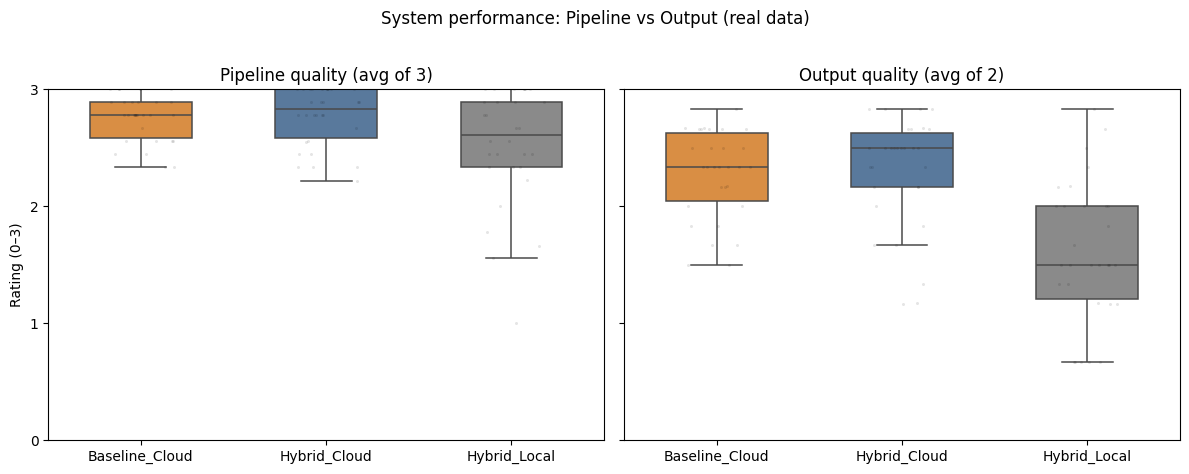

In [37]:
perf = df_long[df_long["metric"] != DIFF_METRIC].copy()

pipe_df = (perf[perf["metric"].isin(PIPELINE_METRICS)]
           .groupby(["prompt_id","system"], as_index=False)
           .agg(value=("score","mean")))
pipe_df["group"] = f"Pipeline quality (avg of {len(PIPELINE_METRICS)})"

out_df = (perf[perf["metric"].isin(OUTPUT_METRICS)]
          .groupby(["prompt_id","system"], as_index=False)
          .agg(value=("score","mean")))
out_df["group"] = f"Output quality (avg of {len(OUTPUT_METRICS)})"

plot_df = pd.concat([pipe_df, out_df], ignore_index=True)
plot_df["system"] = pd.Categorical(plot_df["system"], categories=systems_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(12.0, 4.6), sharey=True)

for ax, grp in zip(axes, plot_df["group"].unique()):
    sub = plot_df[plot_df["group"] == grp].copy()

    sns.boxplot(
        data=sub, x="system", y="value",
        order=systems_order, palette=palette,
        showfliers=False, width=0.55, linewidth=1.1, ax=ax
    )
    sns.stripplot(
        data=sub, x="system", y="value",
        order=systems_order,
        color="black", alpha=0.10, size=2.2, jitter=0.18, ax=ax
    )

    ax.set_title(grp)
    ax.set_xlabel("")
    ax.set_ylabel("Rating (0–3)" if ax is axes[0] else "")
    ax.set_ylim(0, 3)
    ax.set_yticks([0,1,2,3])

fig.suptitle("System performance: Pipeline vs Output (real data)", y=1.02)
plt.tight_layout()
plt.show()

C:\Users\DarioKulaszewski\AppData\Local\Temp\ipykernel_47028\3045756034.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = (df_long.groupby(["metric","system"], as_index=False)


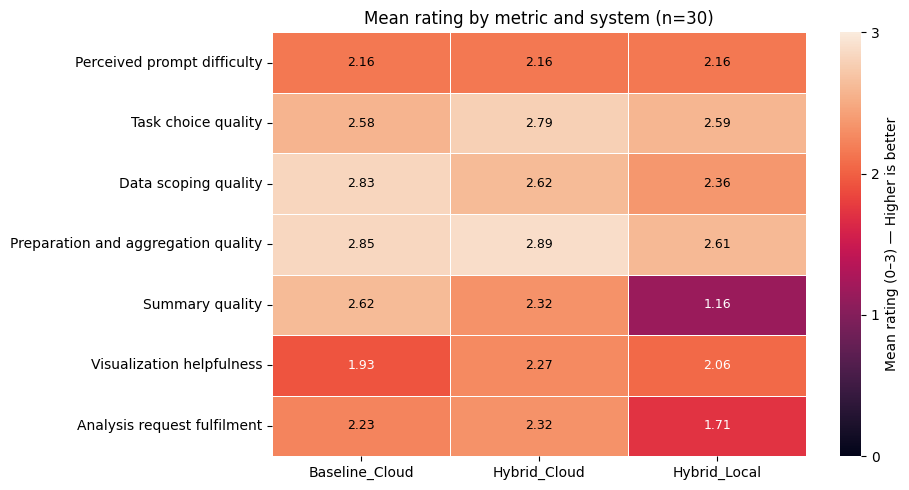

In [20]:
agg = (df_long.groupby(["metric","system"], as_index=False)
       .agg(mean=("score","mean"), n=("score","size")))

agg["metric"] = pd.Categorical(agg["metric"], categories=metric_order, ordered=True)
agg["system"] = pd.Categorical(agg["system"], categories=systems_order, ordered=True)

mean_piv = agg.pivot(index="metric", columns="system", values="mean").reindex(metric_order)
n_piv    = agg.pivot(index="metric", columns="system", values="n").reindex(metric_order)

fig, ax = plt.subplots(figsize=(9.6, 5.0))

vmin, vmax = 0, 3

hm = sns.heatmap(
    mean_piv, ax=ax, vmin=vmin, vmax=vmax,
    annot=False,
    linewidths=0.6, linecolor="white",
    cbar_kws={"label": "Mean rating (0–3) — Higher is better", "ticks": [0,1,2,3]},
)

# das tatsächlich verwendete colormap-Objekt aus der Heatmap holen
cm = hm.collections[0].cmap
norm = hm.collections[0].norm

for i, m in enumerate(mean_piv.index):
    for j, s in enumerate(mean_piv.columns):
        val = mean_piv.loc[m, s]
        if pd.notna(val):
            r, g, b, _ = cm(norm(val))
            luminance = 0.2126*r + 0.7152*g + 0.0722*b
            txt_color = "white" if luminance < 0.55 else "black"

            ax.text(
                j + 0.5, i + 0.5, f"{val:.2f}",
                ha="center", va="center", fontsize=9,
                color=txt_color
            )

ax.set_title("Mean rating by metric and system (n=30)")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()
plt.show()

C:\Users\DarioKulaszewski\AppData\Local\Temp\ipykernel_47028\3053462346.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prompt = (perf.groupby(["prompt_id","system"], as_index=False)
C:\Users\DarioKulaszewski\AppData\Local\Temp\ipykernel_47028\3053462346.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(winner_for_prompt)
C:\Users\DarioKulaszewski\AppData\Local\Temp\ipykernel_47028\3053462346.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

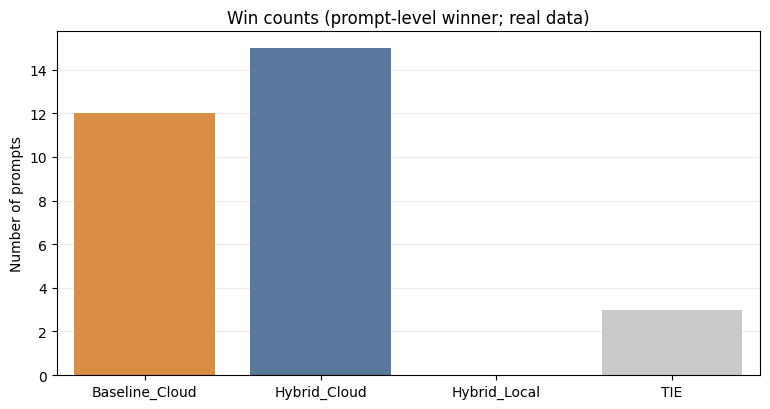

In [15]:
perf = df_long[df_long["metric"] != DIFF_METRIC].copy()

df_prompt = (perf.groupby(["prompt_id","system"], as_index=False)
             .agg(prompt_mean=("score","mean")))

def winner_for_prompt(g):
    g2 = g.sort_values("prompt_mean", ascending=False)
    top = g2.iloc[0]["prompt_mean"]
    tied = g2[g2["prompt_mean"] == top]["system"].tolist()
    return "TIE" if len(tied) > 1 else tied[0]

winners = (df_prompt.groupby("prompt_id")
           .apply(winner_for_prompt)
           .reset_index(name="winner"))

palette_w = {**palette, "TIE": "#C9C9C9"}
winner_order = [*systems_order, "TIE"]

win_counts = (winners.groupby("winner", as_index=False)
              .agg(n_prompts=("prompt_id","nunique")))
win_counts["winner"] = pd.Categorical(win_counts["winner"], categories=winner_order, ordered=True)
win_counts = win_counts.sort_values("winner")

fig, ax = plt.subplots(figsize=(7.8, 4.2))
sns.barplot(data=win_counts, x="winner", y="n_prompts", palette=palette_w, ax=ax)

ax.set_ylabel("Number of prompts")
ax.set_xlabel("")
ax.set_title("Win counts (prompt-level winner; real data)")
ax.grid(True, axis="y", alpha=0.22)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

Top fulfilment drivers (avg |r| across systems): ['Visualization helpfulness', 'Data scoping quality']


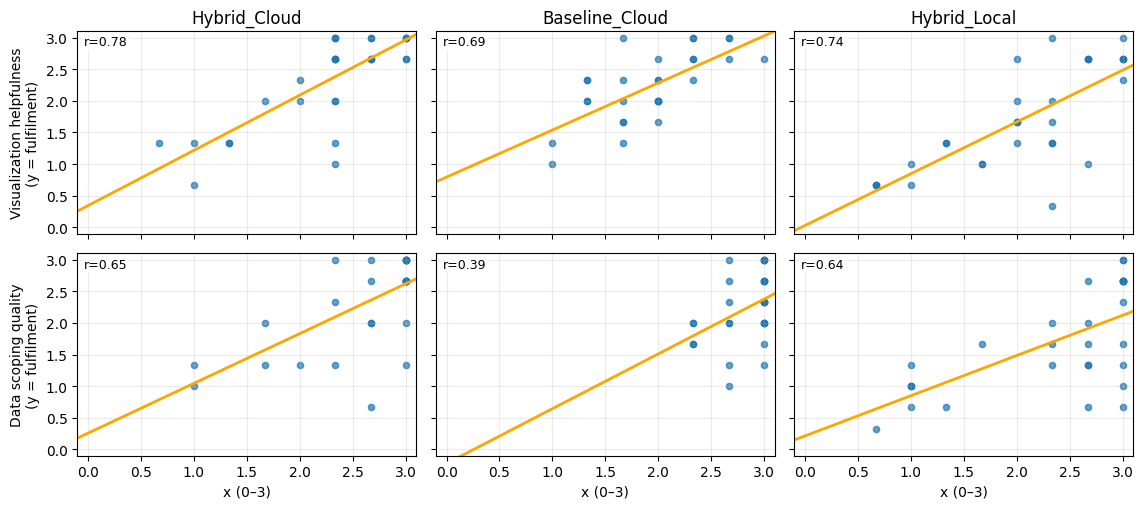

In [39]:
import numpy as np
import matplotlib.pyplot as plt

top_k = 2  # keep it small
# pick top features by average correlation magnitude across systems
top_feats = (r_piv.abs().mean(axis=1).sort_values(ascending=False).head(top_k).index.tolist())
print("Top fulfilment drivers (avg |r| across systems):", top_feats)

fig, axes = plt.subplots(
    nrows=top_k, ncols=len(versions),
    figsize=(3.8 * len(versions), 2.6 * top_k),
    sharex=True, sharey=True
)
axes = np.atleast_2d(axes)

for c, v in enumerate(versions):
    wide = wide_for_version(df2, v)
    for r, feat in enumerate(top_feats):
        ax = axes[r, c]
        x = wide[feat]
        y = wide[target]
        m = x.notna() & y.notna()
        xm, ym = x[m].to_numpy(), y[m].to_numpy()

        ax.scatter(xm, ym, alpha=0.7, s=20)

        # trend line (orange)
        if xm.size >= 2 and np.nanstd(xm) > 0:
            slope, intercept = np.polyfit(xm, ym, 1)
            xs = np.linspace(-0.1, 3.1, 50)
            ax.plot(xs, slope * xs + intercept, color="orange", linewidth=2)

        # annotate r (top-left)
        if xm.size >= 2 and np.nanstd(xm) > 0 and np.nanstd(ym) > 0:
            rr = np.corrcoef(xm, ym)[0, 1]
            txt = f"r={rr:.2f}"
        else:
            txt = "r=NA"
        ax.text(0.02, 0.98, txt, transform=ax.transAxes,
                ha="left", va="top", fontsize=9,
                bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7, edgecolor="none"))

        ax.set_xlim(-0.1, 3.1)
        ax.set_ylim(-0.1, 3.1)
        ax.grid(True, alpha=0.25)

        if r == 0:
            ax.set_title(v)
        if c == 0:
            ax.set_ylabel(f"{feat}\n(y = fulfilment)")
        if r == top_k - 1:
            ax.set_xlabel("x (0–3)")

plt.tight_layout()
plt.show()